# The Complete Game: Once Normal, Now Novel

## What We're Looking For
The modern professional baseball player comes from a different planet than did their old-timey, horse-and-buggy forebears. Today's game is faster, higher-scoring, and split-second timed. Most players' skill sets and repertoire are specialized and weaponized so as to befuddle, speed past, and overpower the suckers wearing the other-colored caps.

This is undisputed.

Also undisputed is that the "professional" baseball player of ~150 years ago was not a full-time, this-is-all-I-do professional. For its first few decades, baseball was a seasonal job played before crowds of maybe a few hundred spectators for the biggest games. 

And owing to the vocation's part-time nature, almost nobody crafted their game with a specialized approach — beyond some penchant, preference, or aptitude for one position or another.

Of all the positions on the diamond, the starting pitcher's role has changed the most.

Relief pitchers weren't really a structured part of the game in its fledgling years. The starting pitcher was the pitcher, and the pitcher usually pitched the entire game.

So what changed?

We'll need Pandas, Numpy, and pybaseball.

In [137]:
import pybaseball as pb
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import scipy.stats as stats
import matplotlib.pyplot as plt

pb.cache.enable()

In [88]:
df = pd.read_csv("../data/pitching.csv")

In [135]:
cg = pd.DataFrame(df.groupby('yearID').CG.describe())

In [139]:
cg.to_csv('cg_describe.csv')

In [34]:
# group pitcher data into per-year dicts, throw to list
year_groups = df.groupby(['yearID']).apply(
    lambda x: [
        list(x['teamID']), 
        list(x['CG']), 
        list(x['IPouts']), 
        list(x['BFP']), 
        list(x['BAOpp']), 
        list(x['BB']), 
        list(x['SO']), 
        list(x['ERA'])
        ]
    ).apply(pd.Series)
year_groups.columns = ['team_ID', 'CG', 'IP_Outs', 'BFP', 'Opp_BA', 'BB', 'SO', 'ERA']
year_groups = year_groups.reset_index()

In [35]:
year = 1871
season_list = []
for counter, _ in enumerate(range(1871, 2021)):
    season = year_groups['yearID']
    season = {}
    season['year'] = year_groups['yearID'][counter]

    season['CG_max'] = max(year_groups['CG'][counter])
    season['CG_min'] = min(year_groups['CG'][counter])
    season['CG_mean'] = stats.mean(year_groups['CG'][counter])
    season['CG_median'] = stats.median(year_groups['CG'][counter])
    season['CG_var'] = stats.variance(year_groups['CG'][counter])

    season['IP_outs_max'] = max(year_groups['IP_Outs'][counter])
    season['IP_outs_min'] = min(year_groups['IP_Outs'][counter])
    season['IP_outs_mean'] = stats.mean(year_groups['IP_Outs'][counter])
    season['IP_outs_median'] = stats.median(year_groups['IP_Outs'][counter])
    season['IP_outs_var'] = stats.variance(year_groups['IP_Outs'][counter])

    season['batters_faced_max'] = max(year_groups['BFP'][counter])
    season['batters_faced_min'] = min(year_groups['BFP'][counter])
    season['batters_faced_mean'] = stats.mean(year_groups['BFP'][counter])
    season['batters_faced_median'] = stats.median(year_groups['BFP'][counter])
    # season['batters_faced_var'] = stats.variance(year_groups['BFP'][counter])

    season['Opp_BA_max'] = max(year_groups['Opp_BA'][counter])
    season['Opp_BA_min'] = min(year_groups['Opp_BA'][counter])
    season['Opp_BA_mean'] = stats.mean(year_groups['Opp_BA'][counter])
    season['Opp_BA_median'] = stats.median(year_groups['Opp_BA'][counter])
    # season['Opp_BA_var'] = stats.variance(year_groups['Opp_BA'][counter])

    season['BB_max'] = max(year_groups['BB'][counter])
    season['BB_min'] = min(year_groups['BB'][counter])
    season['BB_mean'] = stats.mean(year_groups['BB'][counter])
    season['BB_median'] = stats.median(year_groups['BB'][counter])
    season['BB_var'] = stats.variance(year_groups['BB'][counter])

    season['SO_max'] = max(year_groups['SO'][counter])
    season['SO_min'] = min(year_groups['SO'][counter])
    season['SO_mean'] = stats.mean(year_groups['SO'][counter])
    season['SO_median'] = stats.median(year_groups['SO'][counter])
    season['SO_var'] = stats.variance(year_groups['SO'][counter])

    season['ERA_max'] = max(year_groups['ERA'][counter])
    season['ERA_min'] = min(year_groups['ERA'][counter])
    season['ERA_mean'] = stats.mean(year_groups['ERA'][counter])
    season['ERA_median'] = stats.median(year_groups['ERA'][counter])
    # season['ERA_var'] = stats.variance(year_groups['ERA'][counter])
    season_list.append(season)
    

In [36]:
def unique(list):
    x = np.array(list)
    return (np.unique(x)).tolist()

In [37]:
year = 1871
counter = 0
decade_list = [(year // 10) * 10 for year in range(1871, 2021)]
decade_list = unique(decade_list)


In [38]:
len(decade_list)

16

In [39]:
year = 1871
decade_groups = []
for counter, year in enumerate(range(1871, 2021)):
    decade_flag = (year // 10) * 10

    season = year_groups["yearID"]
    season = {}
    season["year"] = year_groups["yearID"][counter]

    season["CG_max"] = max(year_groups["CG"][counter])
    season["CG_min"] = min(year_groups["CG"][counter])
    season["CG_mean"] = stats.mean(year_groups["CG"][counter])
    season["CG_median"] = stats.median(year_groups["CG"][counter])

    season["IP_outs_max"] = max(year_groups["IP_Outs"][counter])
    season["IP_outs_min"] = min(year_groups["IP_Outs"][counter])
    season["IP_outs_mean"] = stats.mean(year_groups["IP_Outs"][counter])
    season["IP_outs_median"] = stats.median(year_groups["IP_Outs"][counter])

    season["batters_faced_max"] = max(year_groups["BFP"][counter])
    season["batters_faced_min"] = min(year_groups["BFP"][counter])
    season["batters_faced_mean"] = stats.mean(year_groups["BFP"][counter])
    season["batters_faced_median"] = stats.median(year_groups["BFP"][counter])
    # season['batters_faced_var'] = stats.variance(year_groups['BFP'][counter])

    season["Opp_BA_mean"] = stats.mean(year_groups["Opp_BA"][counter])
    season["Opp_BA_median"] = stats.median(year_groups["Opp_BA"][counter])
    # season['Opp_BA_var'] = stats.variance(year_groups['Opp_BA'][counter])

    season["BB_max"] = max(year_groups["BB"][counter])
    season["BB_mean"] = stats.mean(year_groups["BB"][counter])
    season["BB_median"] = stats.median(year_groups["BB"][counter])

    season["SO_max"] = max(year_groups["SO"][counter])
    season["SO_min"] = min(year_groups["SO"][counter])
    season["SO_mean"] = stats.mean(year_groups["SO"][counter])
    season["SO_median"] = stats.median(year_groups["SO"][counter])

    season["ERA_mean"] = stats.mean(year_groups["ERA"][counter])
    season["ERA_median"] = stats.median(year_groups["ERA"][counter])
    # season['ERA_var'] = stats.variance(year_groups['ERA'][counter])
    season_list.append(season)

In [40]:
df = pd.DataFrame(season_list)
df.to_csv('by_season.csv')

In [41]:
df_decades = df
df_decades = df_decades.groupby((df_decades.year//10)*10).mean()


In [42]:
df_decades.to_csv('by_decade.csv')

In [44]:
df.columns

Index(['year', 'CG_max', 'CG_min', 'CG_mean', 'CG_median', 'CG_var',
       'IP_outs_max', 'IP_outs_min', 'IP_outs_mean', 'IP_outs_median',
       'IP_outs_var', 'batters_faced_max', 'batters_faced_min',
       'batters_faced_mean', 'batters_faced_median', 'Opp_BA_max',
       'Opp_BA_min', 'Opp_BA_mean', 'Opp_BA_median', 'BB_max', 'BB_min',
       'BB_mean', 'BB_median', 'BB_var', 'SO_max', 'SO_min', 'SO_mean',
       'SO_median', 'SO_var', 'ERA_max', 'ERA_min', 'ERA_mean', 'ERA_median'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='CG_mean'>

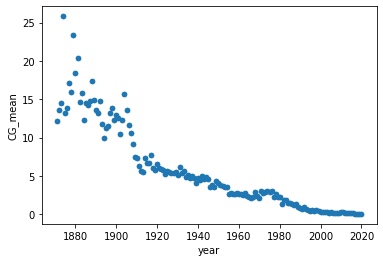

In [57]:
df.plot.scatter(y='CG_mean', x='year')

In [66]:
zscores = stats.zscore(df.CG_mean).to_list()

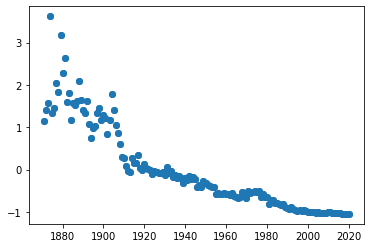

In [70]:
plot.scatter(x=df.year, y=zscores)

In [74]:
df.CG_median.describe()

count    300.000000
mean       2.386667
std        3.316699
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       17.000000
Name: CG_median, dtype: float64

year                      int64
CG_max                    int64
CG_min                    int64
CG_mean                 float64
CG_median               float64
CG_var                  float64
IP_outs_max               int64
IP_outs_min               int64
IP_outs_mean            float64
IP_outs_median          float64
IP_outs_var             float64
batters_faced_max       float64
batters_faced_min       float64
batters_faced_mean      float64
batters_faced_median    float64
Opp_BA_max              float64
Opp_BA_min              float64
Opp_BA_mean             float64
Opp_BA_median           float64
BB_max                    int64
BB_min                  float64
BB_mean                 float64
BB_median               float64
BB_var                  float64
SO_max                    int64
SO_min                    int64
SO_mean                 float64
SO_median               float64
SO_var                  float64
ERA_max                 float64
ERA_min                 float64
ERA_mean